In [1]:
#import Packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import warnings
import pickle
warnings.filterwarnings("ignore")

In [2]:
#reading the csv file

ds = pd.read_csv('SmartphoneFeatures.csv')

In [3]:
ds.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  

[5 rows x 21 columns]

In [4]:
#Shape Of the Dataset

ds.shape

(2000, 21)

In [5]:
#Checking the columns

ds.columns.tolist()

['battery_power',
 'blue',
 'clock_speed',
 'dual_sim',
 'fc',
 'four_g',
 'int_memory',
 'm_dep',
 'mobile_wt',
 'n_cores',
 'pc',
 'px_height',
 'px_width',
 'ram',
 'sc_h',
 'sc_w',
 'talk_time',
 'three_g',
 'touch_screen',
 'wifi',
 'price_range']

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
ds['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [8]:
#Finding missing value if any
ds.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
#Statistical summary of data

ds.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

ds['three_g']=le.fit_transform(ds['three_g'])
ds['touch_screen']=le.fit_transform(ds['touch_screen'])
ds['wifi']=le.fit_transform(ds['wifi'])

## EDA

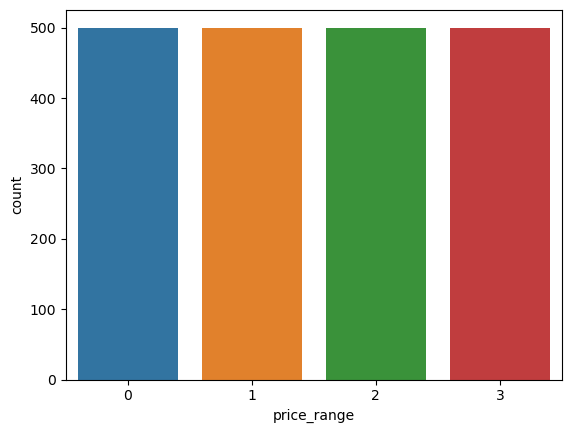

In [11]:
#countplot of target column
sns.countplot(x='price_range', data=ds)
plt.show()

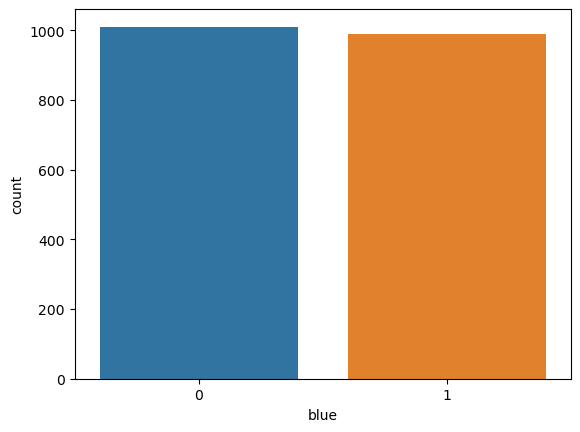

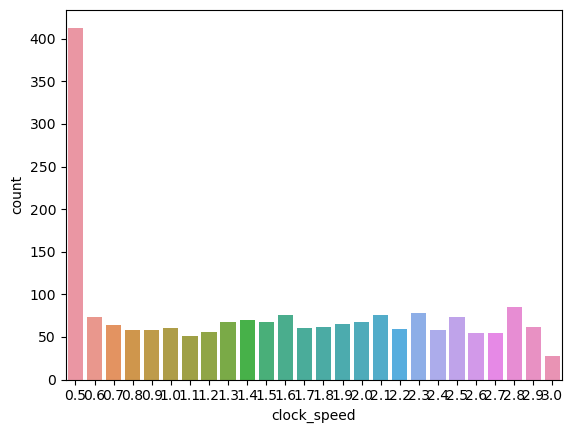

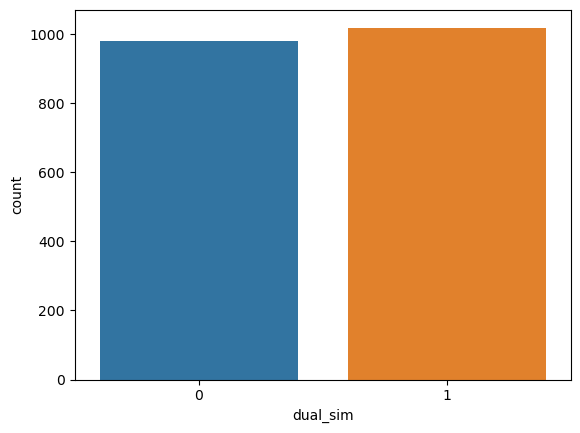

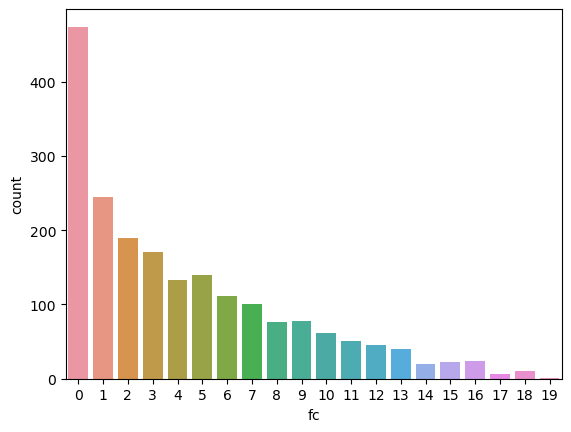

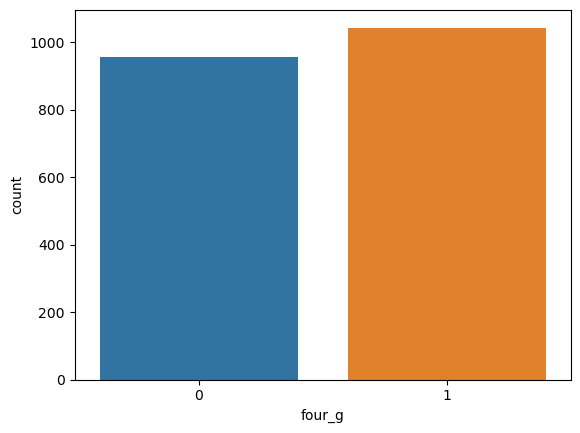

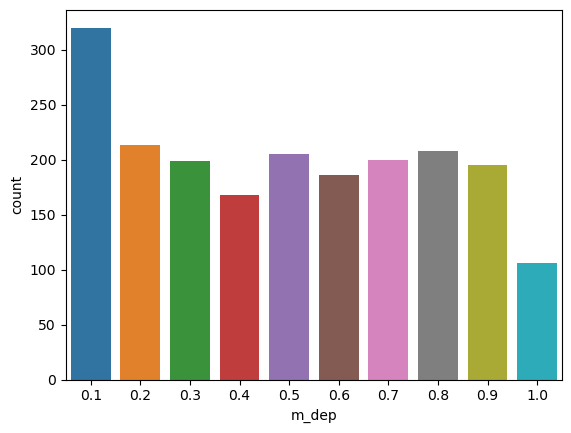

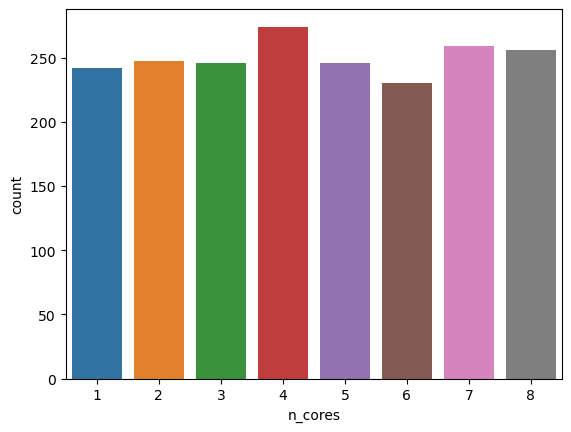

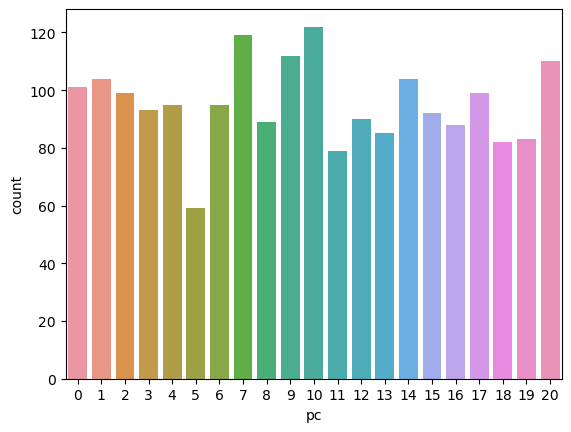

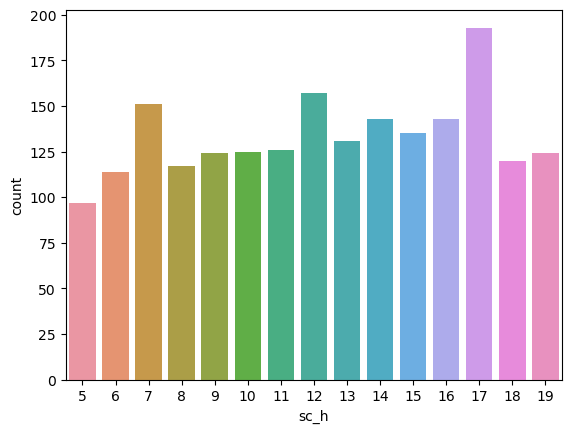

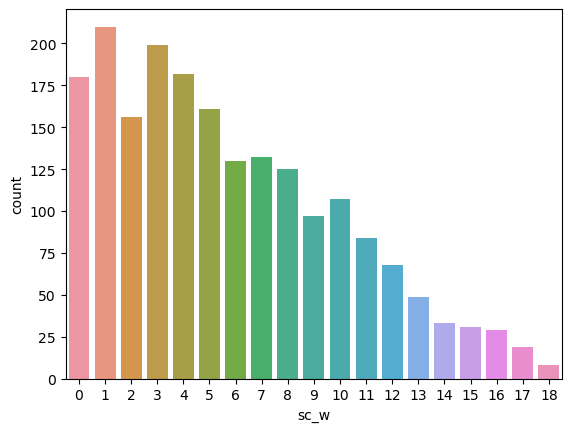

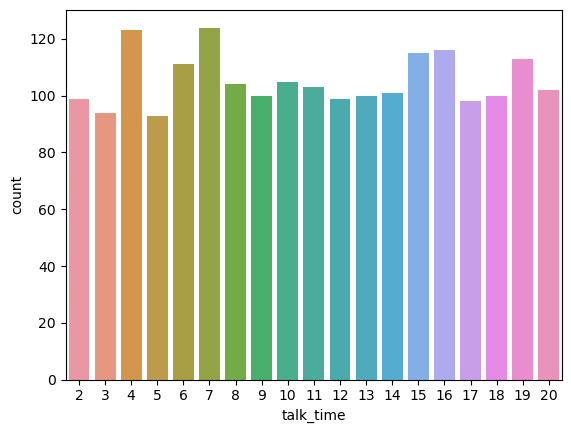

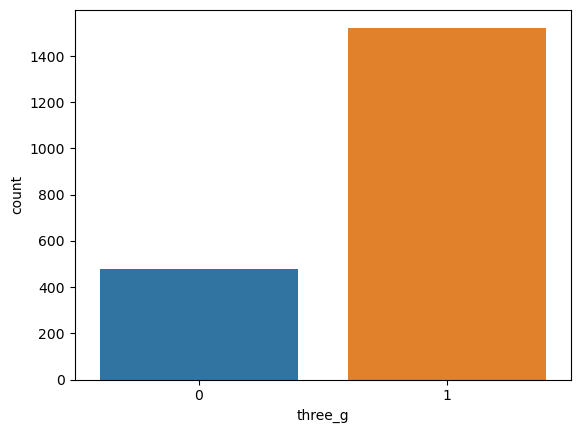

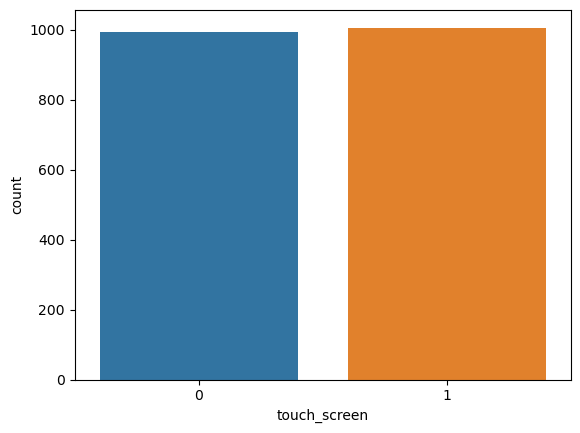

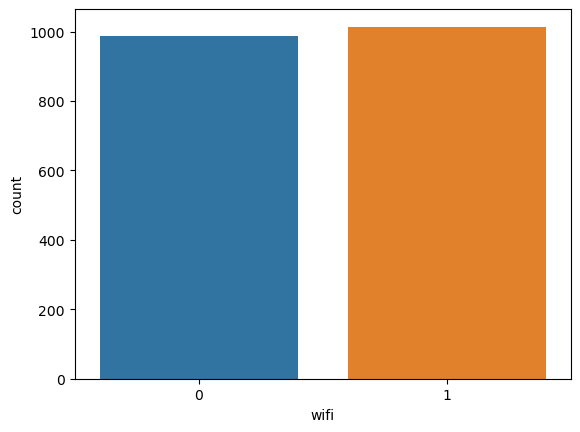

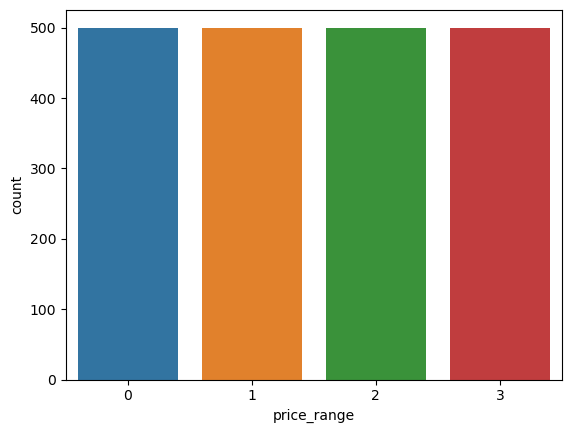

In [12]:
#CountPlot for various columns
for i in ds:
    if(ds[i].nunique()<30):
        sns.countplot(x=ds[i])
        plt.show()

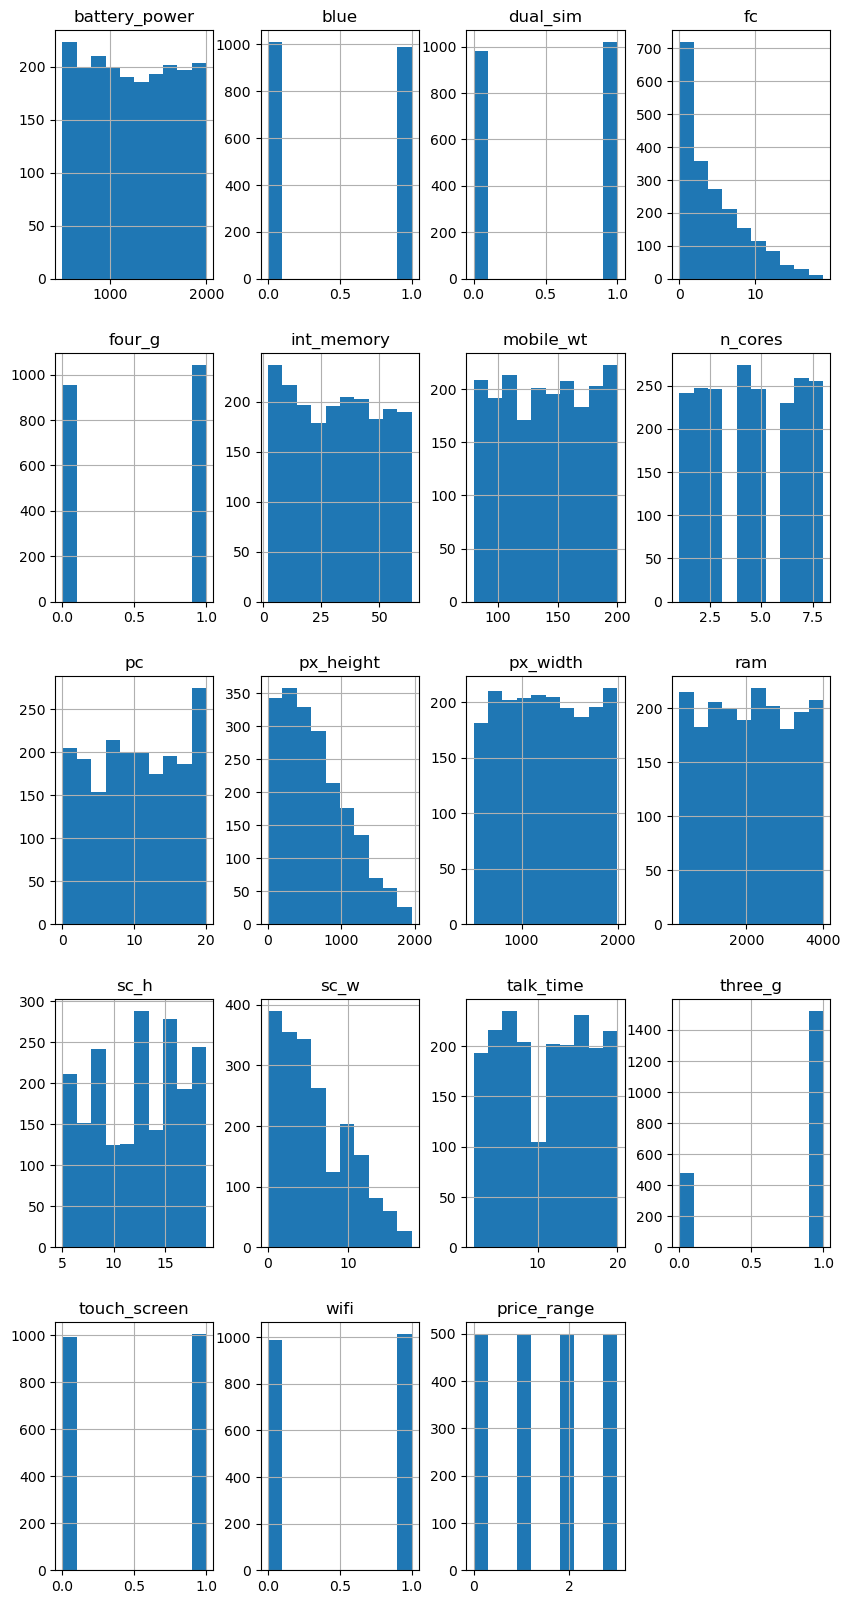

In [13]:
freqgraph = ds.select_dtypes(include = ['int'])
freqgraph.hist(figsize = (10,20))
plt.show()

In [14]:
c=ds.corr()
c

battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
int_memory         -0.004004  0.041177     0.006545 -0.015679 -0.029133   
m_dep               0.034085  0.004049    -0.014364 -0.022142 -0.001791   
mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
px_height           0.014901 -0.006872    -0.014523 -0.020875 -0.009990   
px_width           -0.008402 -0.041533    -0.009476  0.014291 -0.005176   
ram                -0.000653  0.026351     0.003443  0.041072  0.015099   
sc_h               -0.029959 -0.002952    -0.029078 -0.011949 -0.011014   
sc_w               -0.021421  0.000613    -0.007378 -0.016666 -0.012373   
talk_time           0.052510  0.013934    -0.011432 -0.039404 -0.006829   
three_g             0.011522 -0.030236    -0.046433 -0.014008  0.001793   
touch_screen       -0.010516  0.010061     0.019756 -0.017117 -0.014828   
wifi               -0.008343 -0.021863    -0.024471  0.022740  0.020085   
price_range         0.200723  0.020573    -0.006606  0.017444  0.021998   

                 four_g  int_memory     m_dep  mobile_wt   n_cores  ...  \
battery_power  0.015665   -0.004004  0.034085   0.001844 -0.029727  ...   
blue           0.013443    0.041177  0.004049  -0.008605  0.036161  ...   
clock_speed   -0.043073    0.006545 -0.014364   0.012350 -0.005724  ...   
dual_sim       0.003187   -0.015679 -0.022142  -0.008979 -0.024658  ...   
fc            -0.016560   -0.029133 -0.001791   0.023618 -0.013356  ...   
four_g         1.000000    0.008690 -0.001823  -0.016537 -0.029706  ...   
int_memory     0.008690    1.000000  0.006886  -0.034214 -0.028310  ...   
m_dep         -0.001823    0.006886  1.000000   0.021756 -0.003504  ...   
mobile_wt     -0.016537   -0.034214  0.021756   1.000000 -0.018989  ...   
n_cores       -0.029706   -0.028310 -0.003504  -0.018989  1.000000  ...   
pc            -0.005598   -0.033273  0.026282   0.018844 -0.001193  ...   
px_height     -0.019236    0.010441  0.025263   0.000939 -0.006872  ...   
px_width       0.007448   -0.008335  0.023566   0.000090  0.024480  ...   
ram            0.007313    0.032813 -0.009434  -0.002581  0.004868  ...   
sc_h           0.027166    0.037771 -0.025348  -0.033855 -0.000315  ...   
sc_w           0.037005    0.011731 -0.018388  -0.020761  0.025826  ...   
talk_time     -0.046628   -0.002790  0.017003   0.006209  0.013148  ...   
three_g        0.584246   -0.009366 -0.012065   0.001551 -0.014733  ...   
touch_screen   0.016758   -0.026999 -0.002638  -0.014368  0.023774  ...   
wifi          -0.017620    0.006993 -0.028353  -0.000409 -0.009964  ...   
price_range    0.014772    0.044435  0.000853  -0.030302  0.004399  ...   

               px_height  px_width       ram      sc_h      sc_w  talk_time  \
battery_power   0.014901 -0.008402 -0.000653 -0.029959 -0.021421   0.052510   
blue           -0.006872 -0.041533  0.026351 -0.002952  0.000613   0.013934   
clock_speed    -0.014523 -0.009476  0.003443 -0.029078 -0.007378  -0.011432   
dual_sim       -0.020875  0.014291  0.041072 -0.011949 -0.016666  -0.039404   
fc             -0.009990 -0.005176  0.015099 -0.011014 -0.012373  -0.006829   
four_g         -0.019236  0.007448  0.007313  0.027166  0.037005  -0.046628   
int_memory      0.010441 -0.008335  0.032813  0.037771  0.011731  -0.002790   
m_dep           0.025263  0.023566 -0.009434 -0.025348 -0.018388   0.017003   
mo

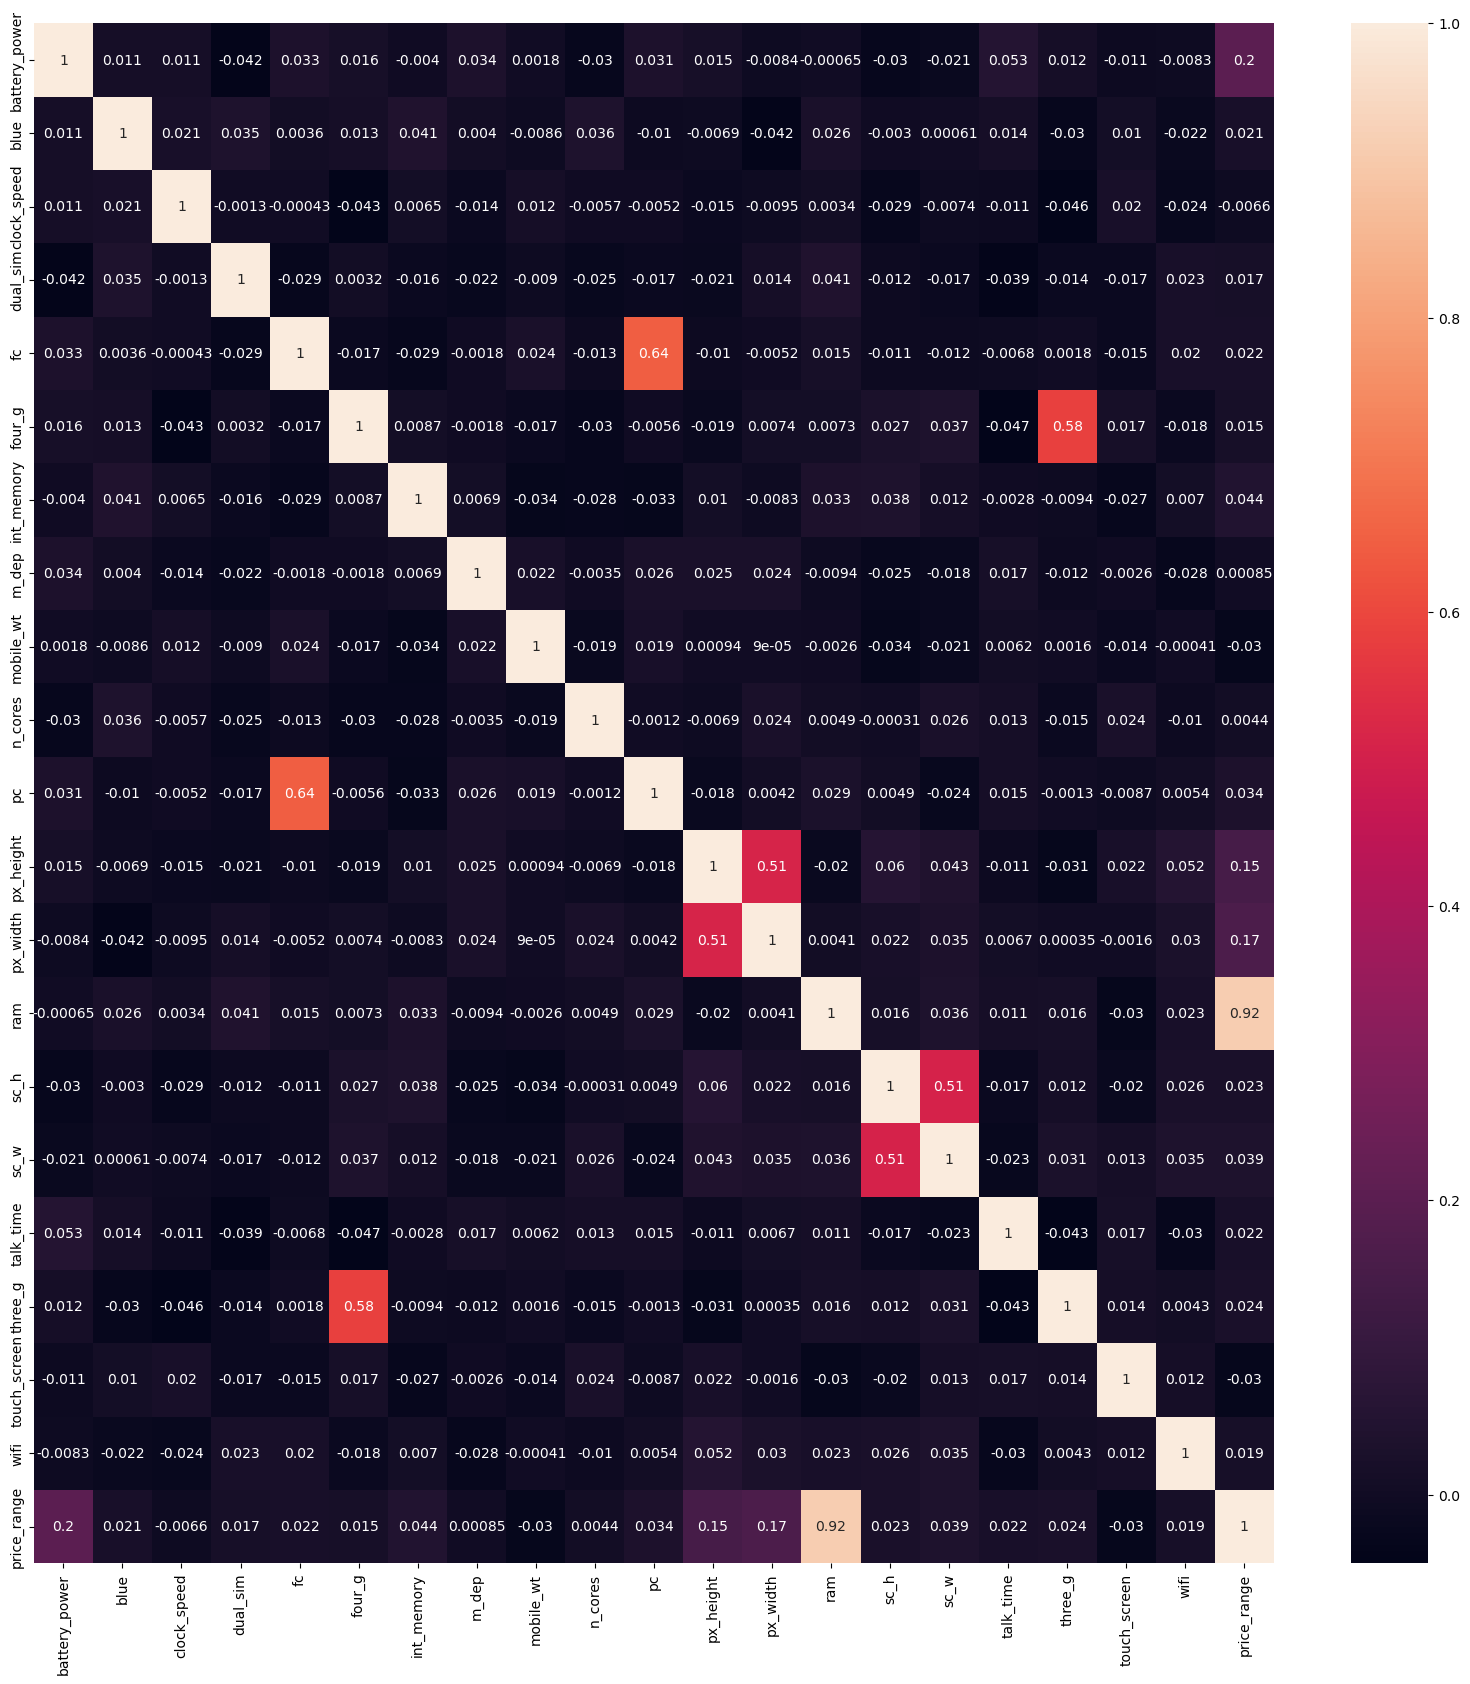

In [15]:
plt.subplots(figsize=(20,20))
sns.heatmap(ds.corr(),annot=True)
plt.show()

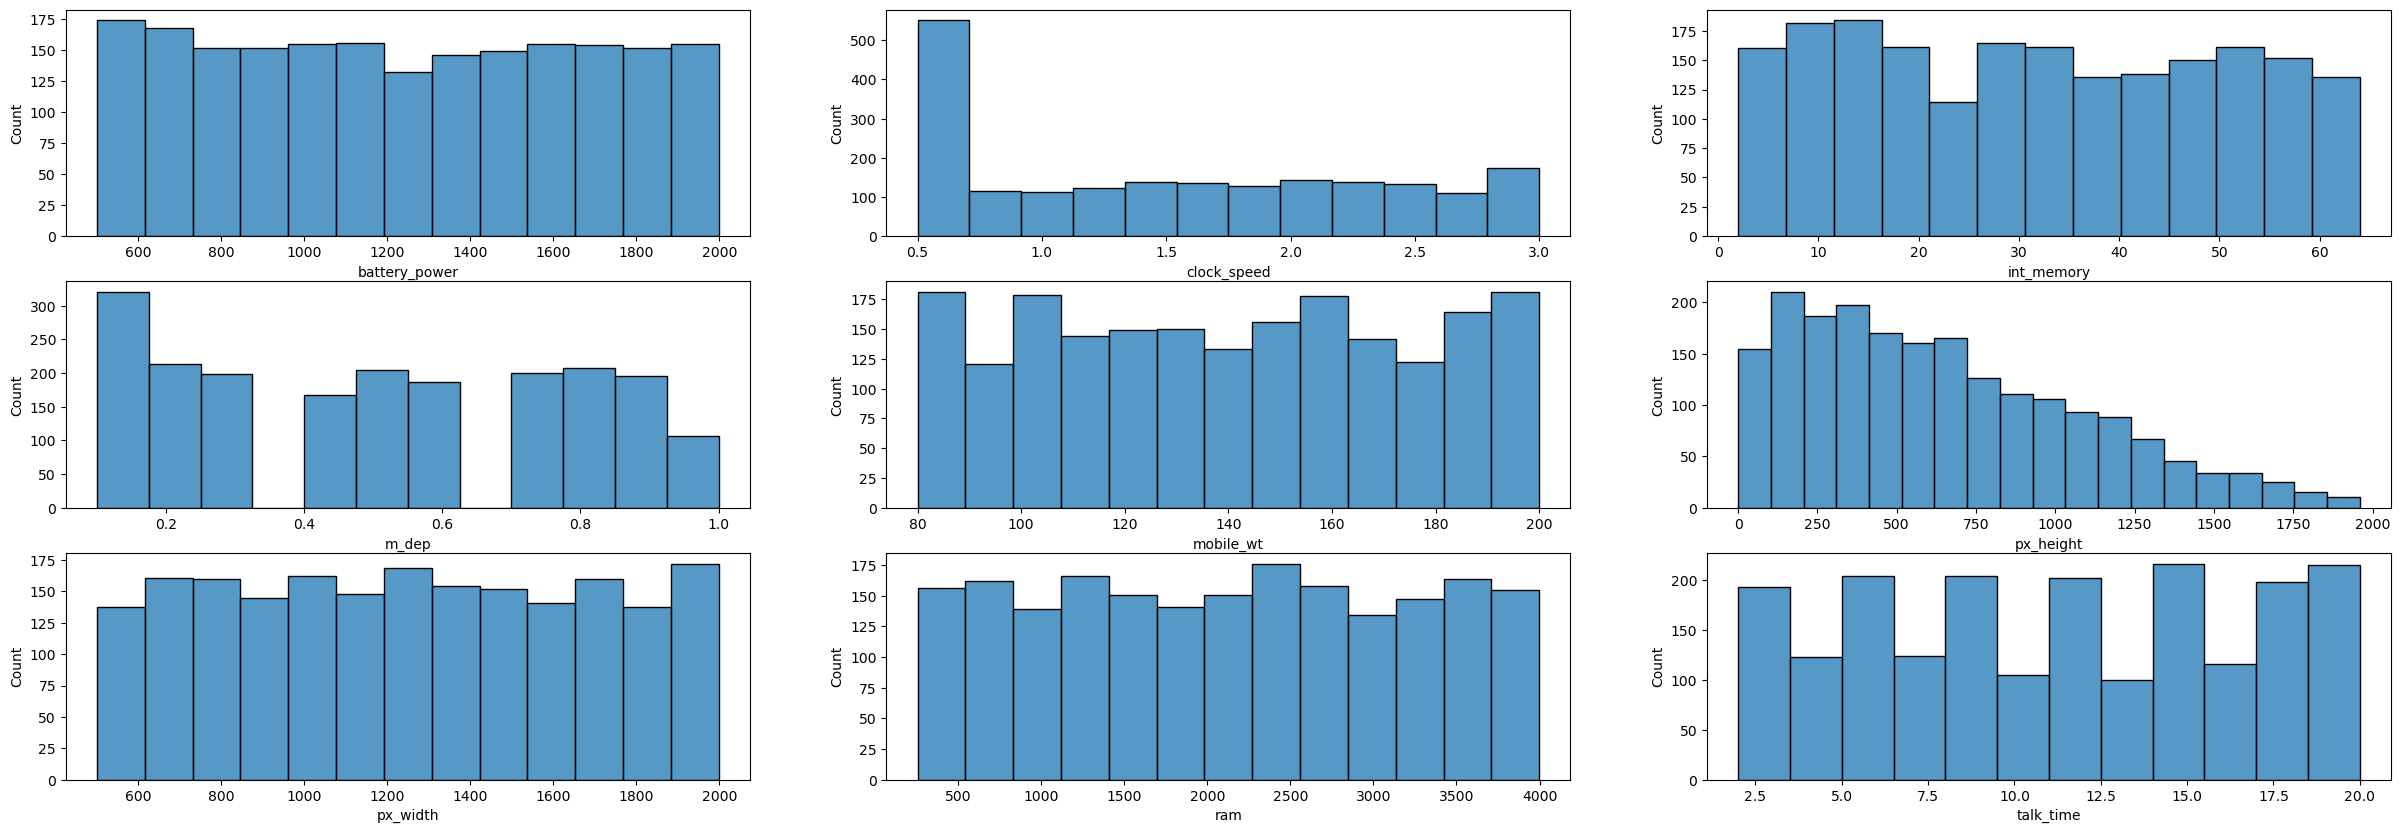

In [16]:
#Distplot for various columns

plt.figure(figsize = (30,10))
plt.subplot(331)
sns.histplot(ds['battery_power'])
plt.subplot(332)
sns.histplot(ds['clock_speed'])
plt.subplot(333)
sns.histplot(ds['int_memory'])
plt.subplot(334)
sns.histplot(ds['m_dep'])
plt.subplot(335)
sns.histplot(ds['mobile_wt'])
plt.subplot(336)
sns.histplot(ds['px_height'])
plt.subplot(337)
sns.histplot(ds['px_width'])
plt.subplot(338)
sns.histplot(ds['ram'])
plt.subplot(339)
sns.histplot(ds['talk_time'])
plt.show()

In [17]:
#Bluetooth devices

import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

ds["is_bluetooth"]=''
for i in range(len(ds)):
    if ds['blue'][i]==0:
        ds['is_bluetooth'][i]='No'
    else:
        ds['is_bluetooth'][i]='Yes'
px.pie(data_frame = ds, names = 'is_bluetooth', title = 'Percentage of devices having bluetooth', hole= 0.2)

In [18]:
#Dual sim

ds["is_DualSim"]=''
for i in range(len(ds)):
    if ds['dual_sim'][i]==0:
        ds['is_DualSim'][i]='No'
    else:
        ds['is_DualSim'][i]='Yes'
px.pie(data_frame = ds, names = 'is_DualSim', title = 'Percentage of devices having dual sim', hole= 0.2)

In [19]:
#4G

ds["is_4G"]=''
for i in range(len(ds)):
    if ds['four_g'][i]==0:
        ds['is_4G'][i]='No'
    else:
        ds['is_4G'][i]='Yes'
px.pie(data_frame = ds, names = 'is_4G', title = 'Percentage of devices having 4G connection', hole= 0.2)

In [20]:
#3G

ds["is_3G"]=''
for i in range(len(ds)):
    if ds['three_g'][i]==0:
        ds['is_3G'][i]='No'
    else:
        ds['is_3G'][i]='Yes'
px.pie(data_frame = ds, names = 'is_3G', title = 'Percentage of devices having 3G connection', hole= 0.2)

In [21]:
#Touch Screen

ds["is_touchscreen"]=''
for i in range(len(ds)):
    if ds['touch_screen'][i]==0:
        ds['is_touchscreen'][i]='No'
    else:
        ds['is_touchscreen'][i]='Yes'
px.pie(data_frame = ds, names = 'is_touchscreen', title = 'Percentage of devices having touch screen', hole= 0.2)

In [22]:
#Wifi

ds["is_wifi"]=''
for i in range(len(ds)):
    if ds['wifi'][i]==0:
        ds['is_wifi'][i]='No'
    else:
        ds['is_wifi'][i]='Yes'
px.pie(data_frame = ds, names = 'is_wifi', title = 'Percentage of devices having Wifi', hole= 0.2)

In [23]:
#Processors

ds["cores"]=''
for i in range(len(ds)):
    if ds['n_cores'][i]==1:
        ds['cores'][i]='single core'
    elif ds['n_cores'][i]==2:
        ds['cores'][i]='dual core'
    elif ds['n_cores'][i]==3:
        ds['cores'][i]='triple core'
    elif ds['n_cores'][i]==4:
        ds['cores'][i]='quad core'
    elif ds['n_cores'][i]==5:
        ds['cores'][i]='penta core'
    elif ds['n_cores'][i]==6:
        ds['cores'][i]='hexa core'
    elif ds['n_cores'][i]==7:
        ds['cores'][i]='hepta core'
    else:
        ds['cores'][i]='octa core'
px.pie(data_frame = ds, names = 'cores', title = 'Percentage of devices having different types of cores', hole= 0.2)

In [80]:
ds = pd.read_csv('SmartphoneFeatures.csv')

In [81]:
#Splitting the data

x = ds.iloc[:, :-1].values
y = ds.iloc[:, -1].values

In [114]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42)

In [115]:
#Scaling

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

### Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf=LogisticRegression()
model=clf.fit(x_train,y_train)
y_pred=model.predict(x_test)
acc_lr = accuracy_score(y_test,y_pred)

In [117]:
print('Accuracy =',acc_lr)

Accuracy = 0.962


### KNN

In [118]:
#knn

from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)


for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model = classifier.fit(x_train,y_train)
    y_pred_k = model.predict(x_test)
    acc_knn = accuracy_score(y_test,y_pred_k)
    metric_k.append(acc_knn)

In [119]:
metric_k

[0.472,
 0.496,
 0.518,
 0.526,
 0.526,
 0.534,
 0.54,
 0.556,
 0.538,
 0.538,
 0.542,
 0.552]

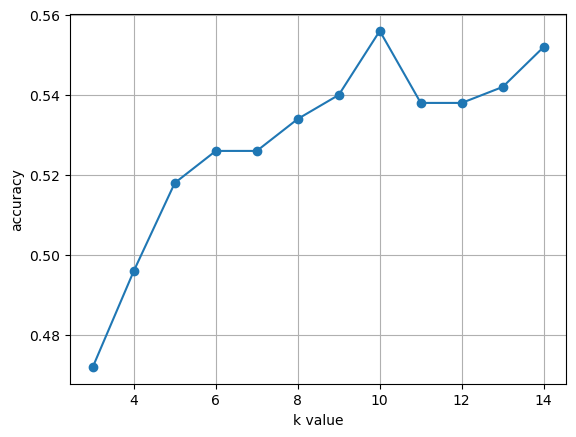

In [120]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [132]:
classifier = KNeighborsClassifier(n_neighbors=10,metric='minkowski',p=2)
model = classifier.fit(x_train,y_train)
y_pred_k = model.predict(x_test)
acc = accuracy_score(y_test,y_pred_k)

In [133]:
print('Accuracy =',acc)

Accuracy = 0.556


### SVM

In [134]:
#SVM

from sklearn.svm import SVC
svmclf=SVC(kernel='rbf')
svmclf.fit(x_train,y_train)
y_pred_svm=svmclf.predict(x_test)
acc_svm = accuracy_score(y_test,y_pred_svm)

In [135]:
print('Accuracy =',acc_svm)

Accuracy = 0.868


### Decision Tree

In [136]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)
y_pred_dt=dt_clf.predict(x_test)
acc_dt = accuracy_score(y_test,y_pred_dt)

In [137]:
print('Accuracy =',acc_dt)

Accuracy = 0.806


In [138]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=50)
rf_clf.fit(x_train,y_train)
y_pred_rf=rf_clf.predict(x_test)
acc_rf = accuracy_score(y_test,y_pred_rf)

In [139]:
print('Accuracy =',acc_rf)

Accuracy = 0.86


In [140]:
#comparison of accuracy

print('ACCURACY\n')
print('LOGISTIC REGRESSION\t','kNN\t\t\t','SVM\t\t\t','DECISION TREE\t\t','RANDOM FOREST\n')
print(accuracy_score(y_test,y_pred),'\t\t\t',accuracy_score(y_test,y_pred_k),'\t\t\t',accuracy_score(y_test,y_pred_svm),'\t\t\t',accuracy_score(y_test,y_pred_dt),'\t\t\t',accuracy_score(y_test,y_pred_rf),'\t')

ACCURACY

LOGISTIC REGRESSION	 kNN			 SVM			 DECISION TREE		 RANDOM FOREST

0.962 			 0.556 			 0.868 			 0.806 			 0.86 	


In [141]:
#Classifiers

import plotly.express as px
classifiers=["LogisticRegression","KNN","SVM","DecisionTreeClassifier","RandomForestClassifier"]
accuracy_=[acc_lr,acc_knn,acc_svm,acc_dt,acc_rf]
df_ac=pd.DataFrame({'model':classifiers,"accuracy":accuracy_})
px.histogram(data_frame=df_ac,x="model",y="accuracy")

In [ ]:
#Logistic Regression Model has the Highest Accuracy Score.